
# Box Office Data Exploration and Analysis

## Introduction:

Microsoft is keen on moving towards the industry of creating original video content. They look to establish a studio that produces video content focused on film cinema. It is therefore paramount to explore and analyse the box office and the general public's reception towards films in regards of box office ratings and revenue. In this notebook, we shall engage in the exploration and analysis of data from reputable movie websites and idealize insights that will help direct the studio executives in the route to take in the type of filmography they should create.

## Objectives:

* Identify and load datasets.
* Study and explore box office dataset to understand the structure, characteristics and summary of the data.
* If applicable: transform and clean the dataset appropriately to prepare it for in-depth analysis.
* Perform statistical and exploratory analysis on box office dataset.
* Use meaningful visualizations to portray and enhance analysis.
* Make evaluations on the box office and give useful insights from inferred analyses.

### 1. The Data

The data used in this exploratory analysis is derived from IMBD.com and Box Office Mojo. These are an online database that contains information and statistics about films and the industry. For this project we'll use the datasets from IMDB containing basic information regarding box office films, their ratings and the gross revenue the films produced.

**Loading the data:**

A total of 3 datasets will be loaded as dataframes and analysed using third-party python libraries.

In [35]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The datasets loaded are loaded from `zippedData` are `'imdb.title.basics.csv.gz'`, `'imdb.title.ratings.csv.gz'` and `'bom.movie_gross.csv.gz'`

In [2]:
# loading and previewing datasets:
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


From previewing the loaded datasets, we can observe that `imdb_basics` dataframe has information such as the title, the year it came out, the running time in minutes and the genres. `imdb_ratings` has information on the average ratings and the total votes per film. Lastly, `gross` gives us information on the gross revenue made by the film both domestically and internationally in th year it come out.

**Understanding the data**:

It would be good to understand the total records each dataframe has to see the density of information we'll be working with. Furthermore, it'll be necessary to print a metadata summary of information to see what type of data we'll be working with for analysis.

In [5]:
# total records info:
print(f'imdb_basics has {imdb_basics.shape[0]} records and {imdb_basics.shape[1]} columns')
print(f'imdb_ratings has {imdb_ratings.shape[0]} records and {imdb_ratings.shape[1]} columns')
print(f'gross has {gross.shape[0]} records and {gross.shape[1]} columns')

imdb_basics has 146144 records and 6 columns
imdb_ratings has 73856 records and 3 columns
gross has 3387 records and 5 columns


In [6]:
# metadata for dataframes:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
# metadata for dataframes:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
# metadata for dataframes:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From looking at the information above, we can notice that `imdb_basics` has the most records with `gross` having the least. Futhermore, the metadata shows us that both `imdb_basics` and `gross` containg missing values as shown by their non-null counts. The Dtype of the foreign_gross column shows that it's an object whereas the value should be numerical. Since we are certain there are missing values, let's confirm the total missing values in each dataframe.

In [9]:
#checking for missing values:
imdb_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
#checking for missing values:
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

* `imdb_basics` has a significant amount of missing values under genres and runtime_minutes. The missing values under original title can be ignored as long as well have the primary_title (which does not have missing values). 
* `gross` has missing information regarding the foreign_gross, studio and domestic gross. Studio has only 5 missing values which can be filled in with the proper studio name through a simple search.

Since `imdb_basics` and `imdb_ratings` have the same source and recognizable primary key, it would wise to first **join the dataframes** to see which records would be removed (due to not sharing primary key). This would be the initial step before the process of transformation and cleaning.

The `imdb_basics` and `imdb_ratings`will be merged in a way to ensure none of the records in `imdb_ratings` are lost.

In [11]:
#joining dataframes with right join
merged = imdb_basics.merge(imdb_ratings, on='tconst', how='right')
merged

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21
...,...,...,...,...,...,...,...,...
73851,tt9805820,Caisa,Caisa,2018,84.0,Documentary,8.1,25
73852,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",7.5,24
73853,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14
73854,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary,7.0,5


There datafram above now has all the records from `imdb_ratings` and only the records with the matching keys ('tconst') from `imdb_basics`. Now let's review the missing values in this merged dataset: 

In [12]:
# checking for missing values on merged dataset:
merged.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

It is clear that the number of missing values in both the runtime_minutes and genres columns has significantly dropped. Now we're working with two dataframes: `merged` and `gross`. The dataframes are now suitable for transformation and cleanup.

**Transforming and Cleaning Up the Data**

For the `merged` dataframe, we'll first start by cleaning up the missing values for runtime_minutes. Films generally tend to run for more than one hour and less that three hours. It would a suitable approach to populate the missing values of runtime with either the mean or median of the existing runtimes_minutes columns. First let's check the film that has the longest runtime and the one with the shortest runtime.

In [13]:
# checking runtime_minutes (most and least)
print('Longest running time:', merged.runtime_minutes.max())
print('Shortest running time:', merged.runtime_minutes.min())

Longest running time: 51420.0
Shortest running time: 3.0


In [14]:
# checking the mean and median for runtime_minutes
print('Mean running time:', merged.runtime_minutes.mean())
print('Median running time:', merged.runtime_minutes.median())

Mean running time: 94.6540400990398
Median running time: 91.0


The results above show that the longest running time for a movie is at 51,420 minutes and the least at 3 minutes. The information show is absurd in the sense that movie cannot have a play duration that lasts a month. It is doubtable anyone would watch that. Additionally a movie that is 3 minutes long is either a music video or an advertisement.

The mean and median however show a realistic timing. The deviation from the max and min is immensely large. Due to this, the mean will definitely be affected by the runtimes that are too short or too long. The median would be a better measure to populate the missing values.

In [15]:
# replacing missing values with median
merged.runtime_minutes.fillna(value=merged.runtime_minutes.median(), inplace=True)
merged.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64

The remaining column with missing values is genres. Checking the value counts will tell us what type of genres are there and the amount they are.

In [16]:
merged.genres.value_counts()

Drama                               11612
Documentary                         10313
Comedy                               5613
Horror                               2692
Comedy,Drama                         2617
                                    ...  
Comedy,Romance,Western                  1
Comedy,Fantasy,Sport                    1
Action,Family,Western                   1
Biography,Documentary,Reality-TV        1
Animation,Family,History                1
Name: genres, Length: 923, dtype: int64

The information above tells us that there's films with multiple genres however the most common genres are dramas and documentaries. For now we'll ignore the missing values in the genres column.

The `gross` dataframe contains a significant amount missing data in the foreign_gross column. Furthermore, the data is structured in the form of objects. Regarding this information, it'd be a favoured choice to drop the foreign_gross column and study the domestic_gross column.

In [17]:
gross = gross.drop('foreign_gross', axis=1)

In [18]:
# checking missing values in domestic_gross
gross[gross.domestic_gross.isna()]

#checking statistics summary
gross.domestic_gross.describe() 

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

The mean and median have a noticeable difference when observed. Therefore it would be preferable to use median as the suitable measure central tendency to fill in the null values of domestic_gross.

In [19]:
# assigning median to a variable
median = gross.domestic_gross.median()

#filling in missing values with variable.
gross.domestic_gross.fillna(value=median, inplace=True)

#check isna().sum() again
gross.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

The final step taken in cleaning up both dataframes is to check if there are any duplicated rows and to drop them

In [20]:
# checking for duplicates
merged[merged.duplicated()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [21]:
# checking for duplicates
gross[gross.duplicated()]

,title,studio,domestic_gross,year


Both dataframes `merged` and `gross` have been 'spruced' up as much as possible while trying maintain as much information as we could. Now we'll used these two dataframes to do statistical study, exploratory analysis and create insightful visualizations

### 2. Exploratory Analysis

To garner more understanding of these two datasets, each shall be explored to understand the information in each subset and how it relates to the other subset as well as statistical studies. Areas of focus will be the years of release, number of ratings, number of votes and the domestic gross revenue for the films. 

In [22]:
merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [23]:
# checking the year which most films in the dataframe are from:
merged.start_year.value_counts()

2016    8721
2017    8713
2015    8494
2014    8371
2013    7990
2012    7680
2018    7526
2011    7389
2010    6792
2019    2180
Name: start_year, dtype: int64

In [24]:
# checking the highest averagerating
merged.averagerating.max()

10.0

In [25]:
# check the film with the highest averagerating
rating_10 = merged[merged.averagerating ==10]
rating_10

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
6784,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
7017,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5
8992,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
26153,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
27644,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
34334,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
45335,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
45660,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
47796,tt4944240,Dog Days in the Heartland,Dog Days in the Heartland,2017,91.0,Drama,10.0,5
49073,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7


In [26]:
#checking years of films with highest rating
rating_10.start_year.value_counts()

2019    5
2015    4
2018    3
2012    1
2010    1
2017    1
2016    1
Name: start_year, dtype: int64

In [27]:
#checking genre of films with highest rating
rating_10.genres.value_counts()

Documentary            11
Adventure,Comedy        1
Comedy,Drama            1
Documentary,History     1
Crime,Documentary       1
Drama                   1
Name: genres, dtype: int64

The codes above show that (according to the dataset) majority of films were released in 2016 with the least amount of films being released in 2019. However when comparing the films that received the highest rating (per the IMDB rating scale), the highest rated films came from 2019 and with documentaries being receiving the highest ratings. When we observed the numvotes column, we noticed that the number of votes in highest ratings are relatively low. Supposed the numvotes affects the average rating?

In [28]:
# rating_10 averagerating and numvotes
rating_10[['averagerating', 'numvotes']]

,averagerating,numvotes
6784,10.0,5
7017,10.0,5
8992,10.0,5
26153,10.0,5
27644,10.0,5
34334,10.0,8
45335,10.0,5
45660,10.0,5
47796,10.0,5
49073,10.0,7


In [29]:
# lowest average rating 
merged.averagerating.min()

1.0

In [30]:
# check the film with the lowest averagerating
rating_1 = merged[merged.averagerating == 1]
rating_1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
547,tt7762194,Clownfish,Clownfish,2010,83.0,"Drama,Romance",1.0,67
1301,tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449
4667,tt1872215,Tunnel Rendez-vous,Tonneru randebû,2011,91.0,Comedy,1.0,125
7312,tt8176282,Des figues en avril,Des figues en avril,2018,52.0,Documentary,1.0,27
7893,tt3855260,Yurameku,Yurameku,2014,61.0,"Fantasy,Mystery,Romance",1.0,520
...,...,...,...,...,...,...,...,...
64876,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama,1.0,17
65791,tt3235258,My First Love,Hatsukoi,2013,82.0,Drama,1.0,510
66138,tt7831076,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama",1.0,96
67131,tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama,1.0,223


In [31]:
# checking years for films with lowest rating
rating_1.start_year.value_counts()

2016    14
2011    11
2018     9
2015     8
2017     5
2014     5
2013     4
2012     4
2010     4
2019     1
Name: start_year, dtype: int64

In [32]:
# checking genres for films with lowest rating
rating_1.genres.value_counts()

Drama                         15
Horror                         8
Comedy                         7
Comedy,Drama                   5
Documentary                    5
Drama,Horror,Thriller          2
Action,Drama,Horror            1
Horror,Thriller                1
Adventure,Comedy               1
Action,Horror,Thriller         1
Adventure                      1
Drama,Family,Romance           1
Adventure,Animation,Family     1
Fantasy,Mystery,Romance        1
Adventure,Drama,Sci-Fi         1
Animation                      1
Romance                        1
Comedy,Fantasy                 1
Drama,Romance                  1
Documentary,Music              1
Comedy,Drama,Romance           1
Adventure,Biography,Comedy     1
Drama,Music                    1
Thriller                       1
Drama,Family                   1
Family                         1
Action,Sci-Fi,Thriller         1
Comedy,Drama,Horror            1
Name: genres, dtype: int64

In [33]:
# checking rating with number of votes
rating_1[['averagerating', 'numvotes']]

,averagerating,numvotes
547,1.0,67
1301,1.0,449
4667,1.0,125
7312,1.0,27
7893,1.0,520
...,...,...
64876,1.0,17
65791,1.0,510
66138,1.0,96
67131,1.0,223


When checking the lowest average rating for films, it's noticeable that there are significantly more that those that have the highest rating. Furthermore the most common genre for these films are dramas. The numvotes here are varying in numbers but are significantly more that the highest average rating films. The majority of these films were also released in 2016 which is aslo the year most films were released.

To study the rest of the ratings, categorising them as below average, average and above_average might bring more insight.
* `below_average`: average rating is less than 5
* `average_`: average rating is exactly 5
* `above_average`: average rating is more than 5

In [34]:
# record of averageratings according to: less than 5, exactly 5, greater than 5
below_average = merged[merged.averagerating < 5]
average = merged[merged.averagerating == 5]
above_average = merged[merged.averagerating > 5]

In [55]:
# how many records are there in each rating subset
print(f"The below average average-rating of films are {len(below_average)} records")
print(f"The average average-rating of films  are {len(average)} records ")
print(f"The above average average-rating of films are {len(above_average)} records")

The below average average-rating of films are 12383 records
The average average-rating of films  are 1059 records 
The above average average-rating of films are 60414 records


There's evidently more number of votes for the films that have average ratings of more than 5 while the least are those with ratings of 5. It's still unclear whether the number of votes have any effect the average rating.

In [66]:
# checking max and min ratings
print(below_average.numvotes.min())
print(below_average.numvotes.max())

5
279126


In [67]:
# checking max and min ratings
print(average.numvotes.min())
print(average.numvotes.max())

5
211733


In [68]:
# checking max and min ratings
print(above_average.numvotes.min())
print(above_average.numvotes.max())

5
1841066


The information above shows that due to the large difference of minimum and maximum votes for the three rating subsets, it's possible that the number of votes have little impact on the average rating. To confirm this theory, the ratings FAQ on https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?showReportContentLink=false# gives this insight on **The rating on a title changed even though the total number of votes did not. Can you explain this?** as :

*There are several possible explanations for this. First, users are allowed to delete their own votes. So if the rating changes even when the total doesn't, it usually means that some people have deleted their vote while the same number of people have added theirs. Another common explanation is that the weight assigned to votes cast by certain users has changed, so the weighted rating will be affected even when no new votes have been cast.
Finally, please remember that our voting system is always being improved and the formulas used to calculate ratings (and defeat ballot stuffing) are tweaked regularly -- weighted ratings are frequently recalculated, so when the formula is changed the ratings will also change even without new votes.*

Therefore, number of votes shall considered as inherently non-influential to average_ratings


**Average ratings vs. Genres:**

It was already noticed that the highests average rated film genre was documentaries whereas the least was drama. However it would be interesting to view this distrubution in the three rating subsets.

In [146]:
#top 10 genres with below average ratings
below_top10 = below_average.genres.value_counts()[:10]
below_top10

Comedy             1520
Horror             1447
Drama              1088
Horror,Thriller     560
Thriller            481
Documentary         325
Action              305
Comedy,Drama        300
Comedy,Romance      248
Comedy,Horror       243
Name: genres, dtype: int64

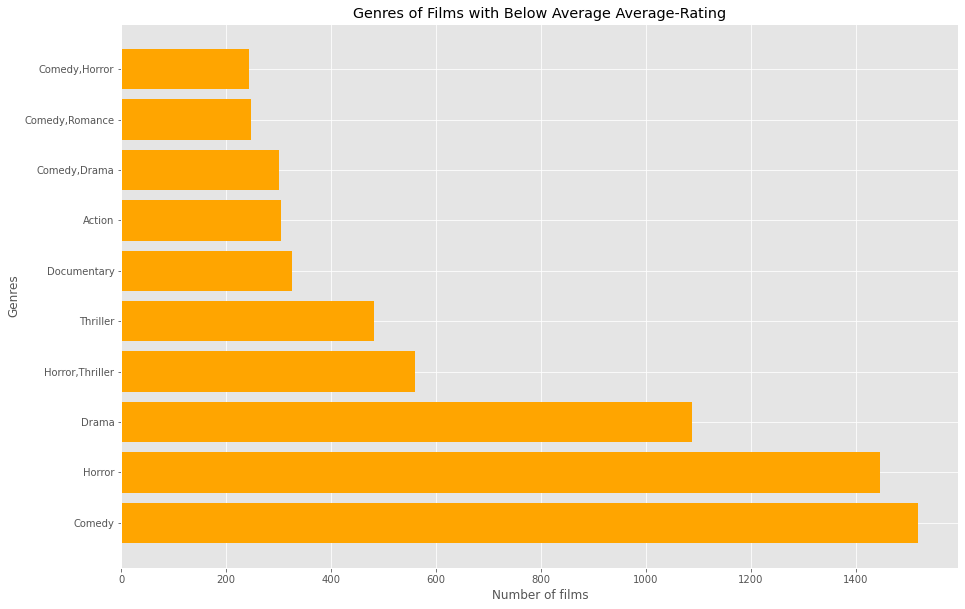

In [150]:
# plotting genres lowest rating
fig, ax = plt.subplots(figsize=(15,10))

x= below_top10.index # genre names
y= below_top10
plt.style.use('ggplot')
ax.barh(x, y, color='orange', alpha=1)
ax.set_ylabel('Genres')
ax.set_xlabel('Number of films')
ax.set_title('Genres of Films with Below Average Average-Rating');

In [92]:
#top 10 genres with below average ratings
above_top10 = above_average.genres.value_counts()[:10]
above_top10

Drama                   10395
Documentary              9936
Comedy                   3972
Comedy,Drama             2277
Drama,Romance            1311
Horror                   1188
Comedy,Drama,Romance     1065
Thriller                 1027
Comedy,Romance            959
Drama,Thriller            799
Name: genres, dtype: int64

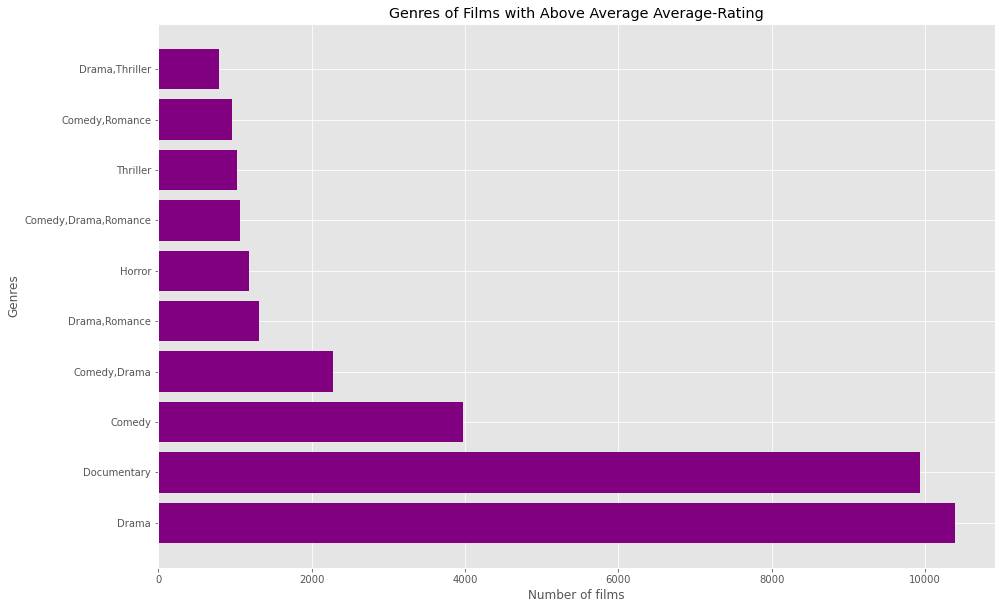

In [149]:
# plotting genres lowest rating
fig, ax = plt.subplots(figsize=(15,10))

x= above_top10.index # genre names
y= above_top10

ax.barh(x, y, color='purple', alpha=1)
ax.set_ylabel('Genres')
ax.set_xlabel('Number of films')
ax.set_title('Genres of Films with Above Average Average-Rating');

The two graphs show that comedy tends to receive lower ratings whereas drama receives above average ratings. However when it comes to the highest rating (10/10), this is still occupied by documentaries. Horror especially comedy-horrors tends to get below average ratings as seen above Furthermore due to several films being of multi-genre. Therefore, it's easier to infer that documentaries are the only films not catergorised as multi-genre i.e. feature as a cross-genre and have high ratings.

**Gross Revenue:**

Studying the stastical data of gross earning for films will require merging both dataframe by a key i.e their title. This will involve converting the column names for title to be the same and then performing the merge.

In [104]:
# change column name
gross.rename(columns= {'title' : 'primary_title'}, inplace=True)
gross

,primary_title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [108]:
# merging dataframes
merged_2 = gross.merge(merged, on='primary_title', how='inner')

#dropping 'tconst' column
merged_2 = merged_2.drop('tconst', axis=1)
merged_2

,primary_title,studio,domestic_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,2018,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,2018,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,2018,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,2018,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [155]:
#checking top 10 films with the highest domestic gross.
highest_gross = merged_2[['primary_title', 'domestic_gross', 'runtime_minutes', 'genres']][:15]
highest_gross

,primary_title,domestic_gross,runtime_minutes,genres
0,Toy Story 3,415000000.0,103.0,"Adventure,Animation,Comedy"
1,Inception,292600000.0,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,124.0,"Action,Adventure,Sci-Fi"
5,Tangled,200800000.0,100.0,"Adventure,Animation,Comedy"
6,Despicable Me,251500000.0,95.0,"Animation,Comedy,Family"
7,How to Train Your Dragon,217600000.0,98.0,"Action,Adventure,Animation"
8,The Chronicles of Narnia: The Voyage of the Da...,104400000.0,113.0,"Adventure,Family,Fantasy"
9,The King's Speech,135500000.0,118.0,"Biography,Drama,History"


In [156]:
# running time average:
highest_gross.runtime_minutes.mean()

111.06666666666666

When it comes to box office sales, the films that did well were inherently multi-genre. Animations are one of the highest grossing film genres domestically. Let's if there is any correlation between domestic_gross and averageratings. Futhermore, the running times for these films are at most 148 minutes (non-animation) and 90-95 minutes shortest.

The correlation of earnings and rating is: 0.12


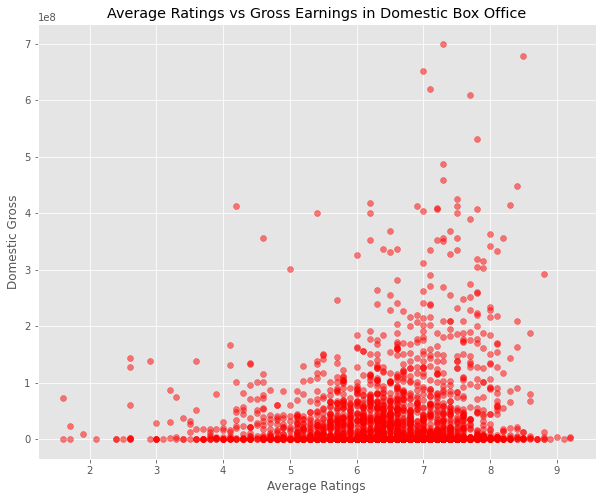

In [143]:
# checking correlation
correlation = merged_2.domestic_gross.corr(merged_2.averagerating)
print('The correlation of earnings and rating is:', round(correlation, 2))

#plotting scatter plot
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(merged_2.averagerating, merged_2.domestic_gross, color='red', alpha=0.5)
ax.set_ylabel('Domestic Gross')
ax.set_xlabel('Average Ratings')
ax.set_title('Average Ratings vs Gross Earnings in Domestic Box Office');

The correlation value of 0.12 shows there is no definite linear relationship between the rating and earnings. It is like for a show to get good rating despite it not having a great box office earning. Let's check correlations in the rest of the dataframe.

In [151]:
merged_2.corr()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
domestic_gross,1.000000,0.009923,0.038711,0.126583,0.119574,0.664792
year,0.009923,1.000000,0.808273,0.034245,0.040499,-0.121836
start_year,0.038711,0.808273,1.000000,0.079682,-0.004172,-0.078001
runtime_minutes,0.126583,0.034245,0.079682,1.000000,0.149809,0.264611
averagerating,0.119574,0.040499,-0.004172,0.149809,1.000000,0.278394
numvotes,0.664792,-0.121836,-0.078001,0.264611,0.278394,1.000000


The above table shows correlation of the columns with numerical values in the dataframe. As observed, nearly of the correlations are at around which signfies a lack of correlation between those various variables. Only a few have negative digits in their correlations which means an increase in the other most likely has an opposite effect on the other but these have to do with dates so they are negligible.

### 3. Evaluations and Insight: Solutions to the problem

As observed, there are various factors that are considered in making a film. For most studios, the important aspect is the box office return earnings from the film. However some films are not released in box office and are only available for streaming and this may not reflect in the box office sales. After studying the datasets from IMBD and Box Office Mojo, I have come to the conclusion that for a studio to create films for the general public:

They should consider genres, running time and of course the earnings. The genres for box office release will differ from those for streaming. I'd suggest to guarantee high ratings from streaming, documentaries be the intial area of focus. When it comes to theatrical releases, multi-genre films would be best. Animation tends to earn higher in box office returns due their family friendly nature. The running times for films should fall at around 100 minutes for animations and should not exceed 150 minutes for actions,sci-fi and fantasy to keep people attentive. 